In [1]:
import Script.Image as Image
import Script.Validation as Validation
import pandas as pd
import matplotlib.pyplot as plt

PROJ: proj_create_from_database: Cannot find proj.db


# DATA PROCESSING

In this notebook, a training and validation dataset will be created. The dataset will include the values of the 13 bands of the S2 MSI and to which class do the pixels belong to: Water (big water surfaces), Rivers (smaller water surfaces) and non-water. This is because the water and river pixels differ a lot from one another.

## Creating the training dataset
Moreover, images from the same place throughout different days vary a lot. This is because of factors such as sunlight and clouds, and other things. Therefore, it is important to include many days in the training dataset.

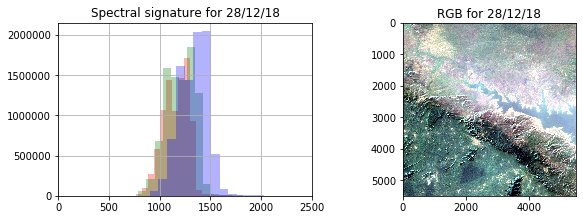

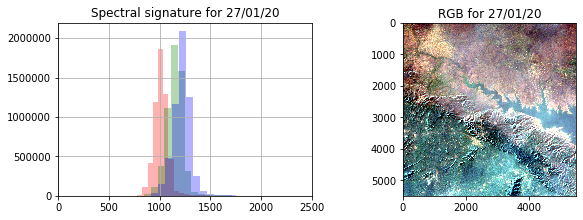

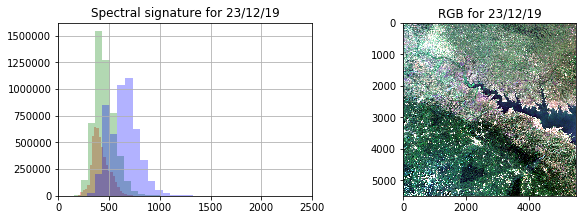

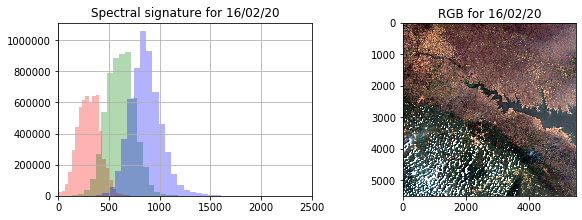

In [16]:
path = 'H:/sentinel2/Ghana/Training/28-12-18/NE/L2A_281218_20_RGB.tif'
Image.spectral_signature(NE_281218,path, '28/12/18')

path = 'H:/sentinel2/Ghana/Training/27-01-20/NE/L2A_270120_20_RGB.tif'
Image.spectral_signature(NE_270120,path, '27/01/20')

path = 'H:/sentinel2/Ghana/Training/23-12-19/NE/L2A_231219_20_RGB.tif'
Image.spectral_signature(NE_231219,path, '23/12/19')

path = 'H:/sentinel2/Ghana/Training/16-02-20/NE/L2A_160220_20_RGB.tif'
Image.spectral_signature(NE_160220,path, '16/02/20')

The training dataset is used using shapefiles. As mentioned before, three will be used (River, Water and Earth) and there is a shapefile for each one of them containing polygons that belong to that class. These are selected by visual judgement from the RGB images.

Then, the shapefiles will be clipped from the GeoTiff images and put into a dataset.

#### Data from 27/01/2020

In [2]:
filepath = "H:/sentinel2/Ghana/Training/27-01-20/NE/L2A_270120_20.tif"
water_path = "H:/sentinel2/Ghana/Training/27-01-20/NE/Shapefiles/Water_Polygon.shp"
ground_path = "H:/sentinel2/Ghana/Training/27-01-20/NE/Shapefiles/Earth_Polygon.shp"
river_path = "H:/sentinel2/Ghana/Training/27-01-20/NE/Shapefiles/River_Polygon.shp"
NE_270120 = Validation.make_dataset(water_path,ground_path,river_path,filepath)

In [3]:
filepath = "H:/sentinel2/Ghana/Training/27-01-20/NW/L2A_270120_20.tif"
water_path = "H:/sentinel2/Ghana/Training/27-01-20/NW/Shapefiles/Water_Polygon.shp"
ground_path = "H:/sentinel2/Ghana/Training/27-01-20/NW/Shapefiles/Earth_Polygon.shp"
river_path = "H:/sentinel2/Ghana/Training/27-01-20/NW/Shapefiles/River_Polygon.shp"
NW_270120 = Validation.make_dataset(water_path,ground_path,river_path,filepath)

In [4]:
filepath = "H:/sentinel2/Ghana/Training/27-01-20/SW/L2A_270120_20.tif"
water_path = "H:/sentinel2/Ghana/Training/27-01-20/SW/Shapefiles/Water_Polygon.shp"
ground_path = "H:/sentinel2/Ghana/Training/27-01-20/SW/Shapefiles/Earth_Polygon.shp"
river_path = "H:/sentinel2/Ghana/Training/27-01-20/SW/Shapefiles/River_Polygon.shp"
SW_270120 = Validation.make_dataset(water_path,ground_path,river_path,filepath)

In [5]:
filepath = "H:/sentinel2/Ghana/Training/27-01-20/SE/L2A_270120_20.tif"
water_path = "H:/sentinel2/Ghana/Training/27-01-20/SE/Shapefiles/Water_Polygon.shp"
ground_path = "H:/sentinel2/Ghana/Training/27-01-20/SE/Shapefiles/Earth_Polygon.shp"
river_path = "H:/sentinel2/Ghana/Training/27-01-20/SE/Shapefiles/River_Polygon.shp"
SE_270120 = Validation.make_dataset(water_path,ground_path,river_path,filepath)

In [6]:
IMG_27120 = pd.concat([NE_270120,NW_270120,SW_270120,SE_270120])

#### Data from 28/12/18

In [7]:
filepath = "H:/sentinel2/Ghana/Training/28-12-18/NE/L2A_281218_20.tif"
water_path = "H:/sentinel2/Ghana/Training/28-12-18/NE/Shapefiles/Water_Polygon.shp"
ground_path = "H:/sentinel2/Ghana/Training/28-12-18/NE/Shapefiles/Earth_Polygon.shp"
river_path = "H:/sentinel2/Ghana/Training/28-12-18/NE/Shapefiles/River_Polygon.shp"
NE_281218 = Validation.make_dataset(water_path,ground_path,river_path,filepath)

In [8]:
filepath = "H:/sentinel2/Ghana/Training/28-12-18/NW/L2A_281218_20.tif"
water_path = "H:/sentinel2/Ghana/Training/28-12-18/NW/Shapefiles/Water_Polygon.shp"
ground_path = "H:/sentinel2/Ghana/Training/28-12-18/NW/Shapefiles/Earth_Polygon.shp"
river_path = "H:/sentinel2/Ghana/Training/28-12-18/NW/Shapefiles/River_Polygon.shp"
NW_281218 = Validation.make_dataset(water_path,ground_path,river_path,filepath)

In [9]:
filepath = "H:/sentinel2/Ghana/Training/28-12-18/SE/L2A_281218_20.tif"
water_path = "H:/sentinel2/Ghana/Training/28-12-18/SE/Shapefiles/Water_Polygon.shp"
ground_path = "H:/sentinel2/Ghana/Training/28-12-18/SE/Shapefiles/Earth_Polygon.shp"
river_path = "H:/sentinel2/Ghana/Training/28-12-18/SE/Shapefiles/River_Polygon.shp"
SE_281218 = Validation.make_dataset(water_path,ground_path,river_path,filepath)

In [10]:
filepath = "H:/sentinel2/Ghana/Training/28-12-18/SW/L2A_281218_20.tif"
water_path = "H:/sentinel2/Ghana/Training/28-12-18/SW/Shapefiles/Water_Polygon.shp"
ground_path = "H:/sentinel2/Ghana/Training/28-12-18/SW/Shapefiles/Earth_Polygon.shp"
river_path = "H:/sentinel2/Ghana/Training/28-12-18/SW/Shapefiles/River_Polygon.shp"
SW_281218 = Validation.make_dataset(water_path,ground_path,river_path,filepath)

In [11]:
IMG_281218 = pd.concat([NE_281218,NW_281218,SE_281218,SW_281218])

#### Data from 23/12/19

In [12]:
filepath = "H:/sentinel2/Ghana/Training/23-12-19/NE/L2A_231219_20.tif"
water_path = "H:/sentinel2/Ghana/Training/23-12-19/NE/Shapefiles/Water_Polygon.shp"
ground_path = "H:/sentinel2/Ghana/Training/23-12-19/NE/Shapefiles/Earth_Polygon.shp"
river_path = "H:/sentinel2/Ghana/Training/23-12-19/NE/Shapefiles/River_Polygon.shp"
NE_231219 = Validation.make_dataset(water_path,ground_path,river_path,filepath)

In [13]:
IMG_231219 = NE_231219

#### Data from 16/02/20

In [14]:
filepath = "H:/sentinel2/Ghana/Training/16-02-20/NE/L2A_160220_20.tif"
water_path = "H:/sentinel2/Ghana/Training/16-02-20/NE/Shapefiles/Water_Polygon.shp"
ground_path = "H:/sentinel2/Ghana/Training/16-02-20/NE/Shapefiles/Earth_Polygon.shp"
river_path = "H:/sentinel2/Ghana/Training/16-02-20/NE/Shapefiles/River_Polygon.shp"
NE_160220 = Validation.make_dataset(water_path,ground_path,river_path,filepath)

In [15]:
IMG_160220 = NE_160220

#### Data from 12/01/20

In [28]:
filepath = "H:/sentinel2/Ghana/Training/12-01-20/SE/L2A_120120_20.tif"
water_path = "H:/sentinel2/Ghana/Training/12-01-20/SE/Shapefiles/Water_Polygon.shp"
ground_path = "H:/sentinel2/Ghana/Training/12-01-20/SE/Shapefiles/Earth_Polygon.shp"
river_path = "H:/sentinel2/Ghana/Training/12-01-20/SE/Shapefiles/River_Polygon.shp"
SE_120120 = Validation.make_dataset(water_path,ground_path,river_path,filepath)

In [29]:
IMG_120120 = SE_120120

### Training dataset

In [30]:
training = pd.concat([IMG_27120, IMG_281218, IMG_231219,IMG_160220, IMG_120120])
training.to_csv(r'Training.csv')

In [39]:
import geopandas as gpd
import pandas as pd

river_path = "H:/sentinel2/Ghana/Training/12-01-20/SE/Shapefiles/River_Polygon.shp"
river2_path = "H:/sentinel2/Ghana/Training/12-01-20/SE/Shapefiles/River_2_Polygon.shp"

df = gpd.read_file(river_path)
df2 = gpd.read_file(river2_path)

x = pd.concat([df,df2])

x.to_file("H:/sentinel2/Ghana/Training/12-01-20/SE/River_Polygon.shp")

CRSError: Invalid input to create CRS: {'init': 'epsg:32630'}